# NB and Logistic Regression Project 

**Build a classification model which will recognise the activities through the mobile sensor like walking, walking_upstairs  ,walking_downstairs ,sitting  ,standing,lying.The topic Human Activity recognition is in research and has its own advantages like anomaly detection, for healthy diet maintenance fitness bands are used , measuring stress level ,for monitoring employees ,for heartbeat pulse rate etc. In this project we are going to focus on  the dataset which was carried out through experiments with a group of 30 volunteers wearing a smartphone.The experiments have been video-recorded to label the data manually.The  main motto is to use the dataset and work with the libraries like scikit learn and machine learning related libraries and algorithms while training.**

#### IMPORTING THE LIBRARIES AND DATA FILE ALONG WITH INITIAL ANALYSIS OF DATA

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.metrics as metrics

import sklearn as sc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

import time
import matplotlib.font_manager
%matplotlib inline

In [2]:
df = pd.read_csv('SHUBHAN MITAL - human_activity.csv')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


The data is very standard with no null values. It is evenly distributed amoungst all the subjects for all activities.

In [3]:
pd.crosstab(df.subject, df.Activity)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
1,50,47,53,95,49,53
3,62,52,61,58,49,59
5,52,44,56,56,47,47
6,57,55,57,57,48,51
7,52,48,53,57,47,51
8,54,46,54,48,38,41
11,57,53,47,59,46,54
14,51,54,60,59,45,54
15,72,59,53,54,42,48


Therefore I am picking subject 23 to compare the activities with the first three variables - mean body acceleration in 3 spatial dimensions to get generally idea between the active and the passive activities.

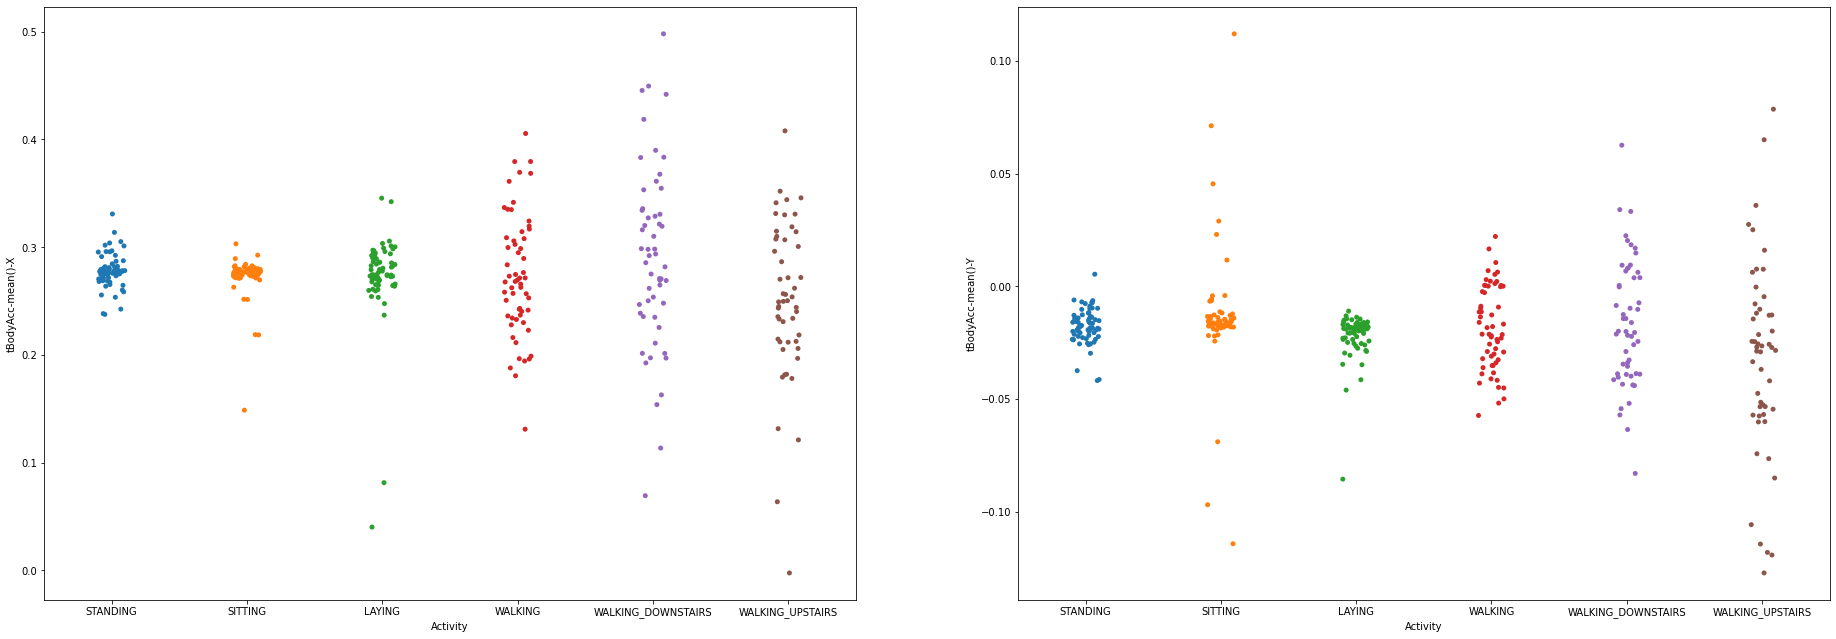

In [4]:
sub23 = df.loc[df['subject']==23]
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sns.stripplot(x='Activity', y=sub23.iloc[:,0], data=sub23, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sns.stripplot(x='Activity', y=sub23.iloc[:,1], data=sub23, jitter=True)
plt.show()

So as we can see the mean body acceleration (especially in the x direction) is more variable for walking activities than for passive ones
Similarly plotting for maximum body acceleration we can see that maximum acceleration is more during the active activities than for passive ones.

In [5]:
df.shape

(7352, 563)

The data has 7352 observations with 563 variables with the first few columns representing the mean and standard deviations of body accelerations in 3 spatial dimensions (X, Y, Z). The last two columns are "subject" and "Acitivity" which represent the subject that the observation is taken from and the corresponding activity respectively.

In [6]:
print('Activities Recorded', df['Activity'].unique())

Activities Recorded ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


We have 6 activities, 3 passive (laying, standing and sitting) and 3 active (walking, walking_downstairs, walking_upstairs) which involve walking. So, each observation in the dataset represent one of the six activities whose features are recorded in the 561 variables. Our goal would be trian a machine to predict one of the six activities given a feature set of these 561 variables. Let’s check how many observations are recorded by each subject.

In [7]:
len=562
df[df.columns[len]].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [8]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


#### NULL AND OUTLIER TREATMENT

In [9]:
df.isnull().values.any()

False

In [10]:
df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

There are no null values

In [11]:
print("Old Shape: ", df.shape)
for x in df:
    if (x!='Activity'):
        #Inter Quartile Range
        Q1 = np.percentile(df[x], 25,method = 'midpoint') #Lower quartile
        Q3 = np.percentile(df[x], 75,method = 'midpoint') #Upper quartile
        IQR = Q3-Q1
        #Bounds and dropping outliers
        df = df[(df[x] <= (Q3+1.5*IQR)) & df[x]>=(Q1-1.5*IQR)]
print("New Shape: ", df.shape)

Old Shape:  (7352, 563)
New Shape:  (4580, 563)


The outliers have been deleted

In [12]:
df['Activity'].replace( 'LAYING', 1, inplace=True )
df['Activity'].replace( 'SITTING', 2, inplace=True)
df['Activity'].replace( 'STANDING', 3, inplace=True)
df['Activity'].replace( 'WALKING', 4, inplace=True)
df['Activity'].replace( 'WALKING_DOWNSTAIRS', 5, inplace=True)
df['Activity'].replace( 'WALKING_UPSTAIRS', 6, inplace=True)

In [13]:
X = df.iloc[:,0:562]  #independent columns
y = df.iloc[:,-1]     #target column activity
# Create and fit selector
X=pd.DataFrame(SelectKBest(score_func=f_regression,k=210).fit_transform(X,y))
X

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,...,-0.973653,-0.952264,-0.980135,-0.992656,-0.701291,-0.991990,-0.991990,-0.990458,-0.871306,0.179941
1,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,...,-0.982659,-0.986321,-0.988296,-0.993979,-0.720683,-0.995854,-0.995854,-0.994544,-1.000000,0.180289
2,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,...,-0.984274,-0.990979,-0.989255,-0.993238,-0.736521,-0.995031,-0.995031,-0.993755,-1.000000,0.180637
3,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.576159,-0.829711,0.843609,...,-0.986850,-0.986749,-0.989413,-0.989136,-0.720891,-0.995221,-0.995221,-0.995226,-0.955696,0.181935
4,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,-0.824705,0.849095,...,-0.987744,-0.991462,-0.991433,-0.989321,-0.763372,-0.995093,-0.995093,-0.995487,-1.000000,0.185151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4575,-0.228968,-0.151583,0.225156,-0.306094,-0.142802,0.288118,0.021923,-0.066118,-0.096099,0.295345,...,-0.186441,-0.068391,-0.412863,-0.535353,0.456563,-0.751385,-0.751385,-0.723832,0.198507,0.247460
4576,-0.314130,-0.287192,0.079174,-0.392787,-0.307278,0.127536,-0.013741,-0.099002,-0.207561,0.211035,...,-0.160296,-0.249977,-0.342722,-0.600881,0.402195,-0.763568,-0.763568,-0.688627,0.182686,0.253222
4577,-0.230796,-0.140521,0.117919,-0.300133,-0.102807,0.181639,0.236195,-0.090957,-0.191700,0.295877,...,-0.175006,-0.275299,-0.424330,-0.485842,0.377132,-0.731667,-0.731667,-0.738074,0.179239,0.213174
4578,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,0.029369,-0.076700,0.273480,...,-0.128549,-0.251258,-0.332753,-0.292601,0.577573,-0.681097,-0.681097,-0.599074,0.310836,0.238604


#### SPLITTING TARGET AND PREDICTOR VARIABLES ALONG WITH TRAIN TEST SPLIT FOLLOWED BY STANDARIZATION PROCESS

In [14]:
X_data = X.iloc[:,0:-1]  #Predictor Variables
X_data

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
0,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,...,-0.961309,-0.973653,-0.952264,-0.980135,-0.992656,-0.701291,-0.991990,-0.991990,-0.990458,-0.871306
1,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,...,-0.983322,-0.982659,-0.986321,-0.988296,-0.993979,-0.720683,-0.995854,-0.995854,-0.994544,-1.000000
2,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,...,-0.986028,-0.984274,-0.990979,-0.989255,-0.993238,-0.736521,-0.995031,-0.995031,-0.993755,-1.000000
3,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.576159,-0.829711,0.843609,...,-0.987836,-0.986850,-0.986749,-0.989413,-0.989136,-0.720891,-0.995221,-0.995221,-0.995226,-0.955696
4,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,-0.824705,0.849095,...,-0.989059,-0.987744,-0.991462,-0.991433,-0.989321,-0.763372,-0.995093,-0.995093,-0.995487,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4575,-0.228968,-0.151583,0.225156,-0.306094,-0.142802,0.288118,0.021923,-0.066118,-0.096099,0.295345,...,-0.139236,-0.186441,-0.068391,-0.412863,-0.535353,0.456563,-0.751385,-0.751385,-0.723832,0.198507
4576,-0.314130,-0.287192,0.079174,-0.392787,-0.307278,0.127536,-0.013741,-0.099002,-0.207561,0.211035,...,-0.137023,-0.160296,-0.249977,-0.342722,-0.600881,0.402195,-0.763568,-0.763568,-0.688627,0.182686
4577,-0.230796,-0.140521,0.117919,-0.300133,-0.102807,0.181639,0.236195,-0.090957,-0.191700,0.295877,...,-0.150506,-0.175006,-0.275299,-0.424330,-0.485842,0.377132,-0.731667,-0.731667,-0.738074,0.179239
4578,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,0.029369,-0.076700,0.273480,...,-0.129727,-0.128549,-0.251258,-0.332753,-0.292601,0.577573,-0.681097,-0.681097,-0.599074,0.310836


In [15]:
y_data = df.iloc[:,-1]    #Target Variable
y_data

0       3
1       3
2       3
3       3
4       3
       ..
7337    6
7340    6
7342    6
7347    6
7348    6
Name: Activity, Length: 4580, dtype: int64

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=.3,random_state=42,shuffle=True)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [17]:
X_train.shape

(3206, 209)

In [18]:
X_test.shape

(1374, 209)

In [19]:
y_train.shape

(3206, 1)

In [20]:
y_test.shape

(1374, 1)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Standardized = pd.DataFrame(scaler.fit_transform(X_data))
X_data

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
0,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,...,-0.961309,-0.973653,-0.952264,-0.980135,-0.992656,-0.701291,-0.991990,-0.991990,-0.990458,-0.871306
1,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,...,-0.983322,-0.982659,-0.986321,-0.988296,-0.993979,-0.720683,-0.995854,-0.995854,-0.994544,-1.000000
2,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,...,-0.986028,-0.984274,-0.990979,-0.989255,-0.993238,-0.736521,-0.995031,-0.995031,-0.993755,-1.000000
3,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.576159,-0.829711,0.843609,...,-0.987836,-0.986850,-0.986749,-0.989413,-0.989136,-0.720891,-0.995221,-0.995221,-0.995226,-0.955696
4,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,-0.824705,0.849095,...,-0.989059,-0.987744,-0.991462,-0.991433,-0.989321,-0.763372,-0.995093,-0.995093,-0.995487,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4575,-0.228968,-0.151583,0.225156,-0.306094,-0.142802,0.288118,0.021923,-0.066118,-0.096099,0.295345,...,-0.139236,-0.186441,-0.068391,-0.412863,-0.535353,0.456563,-0.751385,-0.751385,-0.723832,0.198507
4576,-0.314130,-0.287192,0.079174,-0.392787,-0.307278,0.127536,-0.013741,-0.099002,-0.207561,0.211035,...,-0.137023,-0.160296,-0.249977,-0.342722,-0.600881,0.402195,-0.763568,-0.763568,-0.688627,0.182686
4577,-0.230796,-0.140521,0.117919,-0.300133,-0.102807,0.181639,0.236195,-0.090957,-0.191700,0.295877,...,-0.150506,-0.175006,-0.275299,-0.424330,-0.485842,0.377132,-0.731667,-0.731667,-0.738074,0.179239
4578,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,0.029369,-0.076700,0.273480,...,-0.129727,-0.128549,-0.251258,-0.332753,-0.292601,0.577573,-0.681097,-0.681097,-0.599074,0.310836


#### TRAINING AND TESTING OF USING NAIVE BAYES CLASSIFIER

In [22]:
result_dict_train = {}
result_dict_test = {}
time_dict_modelfit = {}

In [23]:
#1.Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
accuracies = cross_val_score(gnb, X_train, y_train.ravel(), cv=5)
t0 = time.time()
gnb.fit(X_train, y_train.ravel())
y_pred = gnb.predict(X_test)
#Store results in the dictionaries
time_dict_modelfit["Gaussian NB model fit time"]=time.time()-t0 
result_dict_test["Gaussian NB Test Score"]=gnb.score(X_test,y_test.ravel())*100
result_dict_train["Gaussian NB Train Score"] = np.mean(accuracies)*100

In [24]:
#2.Bernoulli Naive Bayes classifier
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
accuracies = cross_val_score(bnb, X_train, y_train.ravel(), cv=5)
t0 = time.time()
bnb.fit(X_train, y_train.ravel())
y_pred = bnb.predict(X_test)
#Store results in the dictionaries
time_dict_modelfit["Bernoulli NB model fit time"]=time.time()-t0 
result_dict_test["Bernoulli NB Test Score"]=bnb.score(X_test,y_test.ravel())*100
result_dict_train["Bernoulli NB Train Score"] = np.mean(accuracies)*100

Bernaulli Naive Bayes Algorithm give better train and test scores along with being faster.

In [25]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index", columns=["Score"])
print(df_result_train)

df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
print(df_result_test)

df_time = pd.DataFrame.from_dict(time_dict_modelfit,orient = "index", columns = ["Time"] )
print(df_time)

                              Score
Gaussian NB Train Score   75.202395
Bernoulli NB Train Score  82.938215
                             Score
Gaussian NB Test Score   84.206696
Bernoulli NB Test Score  84.497817
                                 Time
Gaussian NB model fit time   0.041899
Bernoulli NB model fit time  0.025009


#### TRAINING AND TESTING USING DIFFERENT LOGISTIC REGRESSION MODELS WITH DIFFERENT SOLVERS AND PENALTIES

In [26]:
logistic_result_dict_train = {}
logistic_result_dict_test = {}
logistic_time_dict_modelfit = {}
logistic_score = {}

In [27]:
logisticRegr = LogisticRegression(penalty = 'none',solver = 'lbfgs',random_state = 42)
accuracies = cross_val_score(logisticRegr, X_train, y_train.ravel(), cv=5)
t0 = time.time()
logisticRegr.fit(X_train, y_train.ravel())
predictions=logisticRegr.predict(X_test)
logistic_time_dict_modelfit["Solver = lbfgs Penalty = None fit time"] = time.time()-t0
logistic_result_dict_train["Solver = lbfgs Penalty = None Train Score"] = np.mean(accuracies)*100
logistic_result_dict_test["Solver = lbfgs Penalty = None Test Score"] = logisticRegr.score(X_test,y_test.ravel())*100

In [28]:
logisticRegr = LogisticRegression(penalty = 'l2',solver = 'lbfgs',random_state = 42)
accuracies = cross_val_score(logisticRegr, X_train, y_train.ravel(), cv=5)
t0 = time.time()
logisticRegr.fit(X_train, y_train.ravel())
predictions=logisticRegr.predict(X_test)
logistic_time_dict_modelfit["Solver = lbfgs Penalty = l2  fit time"] = time.time()-t0
logistic_result_dict_train["Solver = lbfgs Penalty = l2 Train Score"] = np.mean(accuracies)*100
logistic_result_dict_test["Solver = lbfgs Penalty = l2 Test Score"] = logisticRegr.score(X_test,y_test.ravel())*100

In [29]:
logisticRegr = LogisticRegression(penalty = 'none',solver = 'newton-cg',random_state = 42)
accuracies = cross_val_score(logisticRegr, X_train, y_train.ravel(), cv=5)
t0 = time.time()
logisticRegr.fit(X_train, y_train.ravel())
predictions=logisticRegr.predict(X_test)
logistic_time_dict_modelfit["Solver = newton-cg Penalty = none fit time"] = time.time()-t0
logistic_result_dict_train["Solver = newton-cg Penalty = none Train Score"] = np.mean(accuracies)*100
logistic_result_dict_test["Solver = newton-cg Penalty = none Test Score"] = logisticRegr.score(X_test,y_test.ravel())*100

In [30]:
logisticRegr = LogisticRegression(penalty = 'l2',solver = 'newton-cg',random_state = 42)
accuracies = cross_val_score(logisticRegr, X_train, y_train.ravel(), cv=5)
t0 = time.time()
logisticRegr.fit(X_train, y_train.ravel())
predictions=logisticRegr.predict(X_test)
logistic_time_dict_modelfit["Solver = newton-cg Penalty = l2 fit time"] = time.time()-t0
logistic_result_dict_train["Solver = newton-cg Penalty = l2 Train Score"] = np.mean(accuracies)*100
logistic_result_dict_test["Solver = newton-cg Penalty = l2 Test Score"] = logisticRegr.score(X_test,y_test.ravel())*100

In [31]:
logisticRegr = LogisticRegression(penalty = 'l1',solver = 'liblinear',random_state = 42)
accuracies = cross_val_score(logisticRegr, X_train, y_train.ravel(), cv=5)
t0 = time.time()
logisticRegr.fit(X_train, y_train.ravel())
predictions=logisticRegr.predict(X_test)
logistic_time_dict_modelfit["Solver = Liblinear Penalty = l1 fit time"] = time.time()-t0
logistic_result_dict_train["Solver = Liblinear Penalty = l1 Train Score"] = np.mean(accuracies)*100
logistic_result_dict_test["Solver = Liblinear Penalty = l1 Test Score"] = logisticRegr.score(X_test,y_test.ravel())*100

In [32]:
logisticRegr = LogisticRegression(penalty = 'l2',solver = 'liblinear',random_state = 42)
accuracies = cross_val_score(logisticRegr, X_train, y_train.ravel(), cv=5)
t0 = time.time()
logisticRegr.fit(X_train, y_train.ravel())
predictions=logisticRegr.predict(X_test)
logistic_time_dict_modelfit["Solver = Liblinear Penalty = l2 fit time"] = time.time()-t0
logistic_result_dict_train["Solver = Liblinear Penalty = l2 Train Score"] = np.mean(accuracies)*100
logistic_result_dict_test["Solver = Liblinear Penalty = l2 Test Score"] = logisticRegr.score(X_test,y_test.ravel())*100

In [33]:
logisticRegr = LogisticRegression(penalty = 'none',solver = 'saga',random_state = 42)
accuracies = cross_val_score(logisticRegr, X_train, y_train.ravel(), cv=5)
t0 = time.time()
logisticRegr.fit(X_train, y_train.ravel())
predictions=logisticRegr.predict(X_test)
logistic_time_dict_modelfit["Solver = Saga Penalty = None fit time"] = time.time()-t0
logistic_result_dict_train["Solver = Saga Penalty = None Train Score"] = np.mean(accuracies)*100
logistic_result_dict_test["Solver = Saga Penalty = None Test Score"] = logisticRegr.score(X_test,y_test.ravel())*100

In [ ]:
logisticRegr = LogisticRegression(penalty = 'l1',solver = 'saga',random_state = 42)
accuracies = cross_val_score(logisticRegr, X_train, y_train.ravel(), cv=5)
t0 = time.time()
logisticRegr.fit(X_train, y_train.ravel())
predictions=logisticRegr.predict(X_test)
logistic_time_dict_modelfit["Solver = Saga Penalty = l1 fit time"] = time.time()-t0
logistic_result_dict_train["Solver = Saga Penalty = l1 Train Score"] = np.mean(accuracies)*100
logistic_result_dict_test["Solver = Saga Penalty = l1 Test Score"] = logisticRegr.score(X_test,y_test.ravel())*100

In [ ]:
logisticRegr = LogisticRegression(penalty = 'l2',solver = 'saga',random_state = 42)
accuracies = cross_val_score(logisticRegr, X_train, y_train.ravel(), cv=5)
t0 = time.time()
logisticRegr.fit(X_train, y_train.ravel())
predictions=logisticRegr.predict(X_test)
logistic_time_dict_modelfit["Solver = Saga Penalty = l2 fit time"] = time.time()-t0
logistic_result_dict_train["Solver = Saga Penalty = l2 Train Score"] = np.mean(accuracies)*100
logistic_result_dict_test["Solver = Saga Penalty = l2 Test Score"] = logisticRegr.score(X_test,y_test.ravel())*100

In [ ]:
df_logistic_result_train = pd.DataFrame.from_dict(logistic_result_dict_train,orient = "index", columns=["Score"])
print(df_logistic_result_train)

df_logistic_result_test = pd.DataFrame.from_dict(logistic_result_dict_test,orient = "index",columns=["Score"])
print(df_logistic_result_test)

df_logistic_time = pd.DataFrame.from_dict(logistic_time_dict_modelfit,orient = "index", columns = ["Time"] )
print(df_logistic_time)

Maximum accuracy is for Solver = "newton-cg" and Penalty "l2" with a runtime that is not significantly different from those of other solvers and penalties

We can say this particular solver worked better as it best equipped to handle multi-class problem such as ours and it does quadratic function minimization.However because it calculates second derivatives its slightly slower although the most accurate Further this penalty worked better as we have codependent features for our classification problem. Codependence tends to increase coefficient variance, making coefficients unreliable/unstable, which hurts model generality. L2 reduces the variance of these estimates, which counteracts the effect of codependencies.

#### PLOTTING THE FINAL CONFUSION  MATRIX FOR THE MOST OPTIMAL MODEL

In [ ]:
#### PLOTTING THE FINAL CONFUSION  MATRIX FOR THE MOST OPTIMAL MODELlogisticRegr = LogisticRegression(penalty = 'l2',solver = 'newton-cg',random_state = 42)
logisticRegr.fit(X_train, y_train.ravel())
predictions=logisticRegr.predict(X_test)
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

Final confusion matrix for Solver = "newton-cg" and Penalty "l2"